Interesting article on "how to subplots with different sizes"
https://scientificallysound.org/2016/06/09/matplotlib-how-to-plot-subplots-of-unequal-sizes/

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [142]:
def load_merge_data():
    user = pd.read_csv('user_table.csv')
    user['date'] = pd.to_datetime(user['date'])
    
    home = pd.read_csv('home_page_table.csv')
    home['home_page']=1
    del home['page']
    
    search = pd.read_csv('search_page_table.csv')
    search['search_page']=1
    del search['page']
    
    paymentp = pd.read_csv('payment_page_table.csv')
    paymentp['payment_page']=1
    del paymentp['page']
    
    paymentc = pd.read_csv('payment_confirmation_table.csv')
    paymentc['payconfirm_page']=1
    del paymentc['page']
    
    df1 = pd.merge(user,home,how='left',on=['user_id'])
    df2 = pd.merge(df1,search,how='left',on=['user_id'])
    df2 = df2.fillna(0)
    df3 = pd.merge(df2,paymentp,how='left',on=['user_id'])
    df3 = df3.fillna(0)
    df4 = pd.merge(df3,paymentc,how='left',on=['user_id'])
    df4 = df4.fillna(0)
    
    return df4


In [174]:
funnel = load_merge_data()
funnel['month'] = pd.DatetimeIndex(funnel['date']).month

In [207]:
funnel.head(4)

,user_id,date,device,sex,home_page,search_page,payment_page,payconfirm_page,month
0,450007,2015-02-28,Desktop,Female,1,0.0,0.0,0.0,2
1,756838,2015-01-13,Desktop,Male,1,0.0,0.0,0.0,1
2,568983,2015-04-09,Desktop,Male,1,1.0,0.0,0.0,4
3,190794,2015-02-18,Desktop,Female,1,1.0,0.0,0.0,2


home_page          90400.0
search_page        45200.0
payment_page        6030.0
payconfirm_page      452.0
dtype: float64

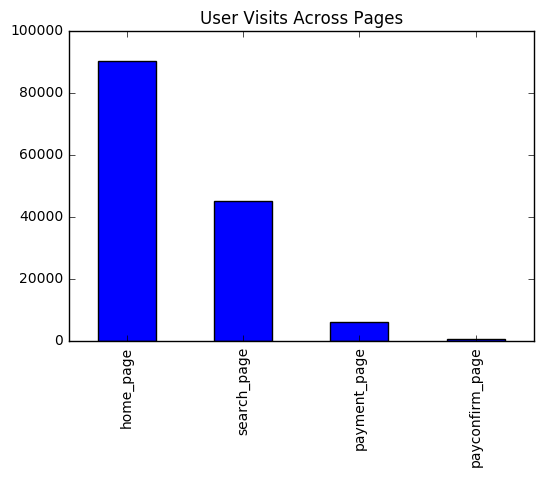

In [143]:
funnel[['home_page','search_page','payment_page','payconfirm_page']].sum().plot(kind='bar',title='User Visits Across Pages')
funnel[['home_page','search_page','payment_page','payconfirm_page']].sum()

,home_page,search_page,payment_page,payconfirm_page
sex,,,,
Female,45075,22676.0,3100.0,241.0
Male,45325,22524.0,2930.0,211.0


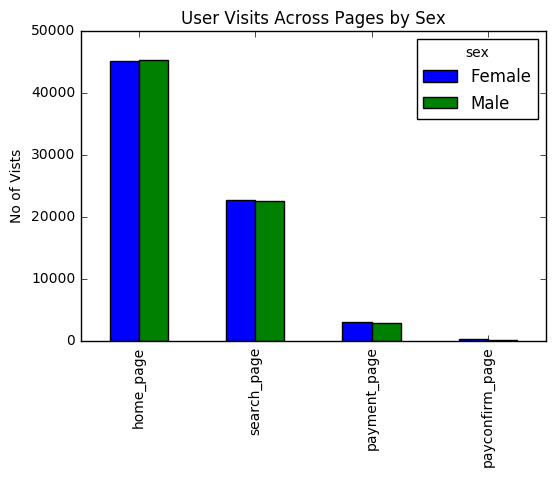

In [144]:
ax = funnel.groupby('sex')['home_page','search_page','payment_page','payconfirm_page'].sum().T.plot(kind='bar',title='User Visits Across Pages by Sex')
ax.set_ylabel('No of Vists')
funnel.groupby('sex')['home_page','search_page','payment_page','payconfirm_page'].sum()

,home_page,search_page,payment_page,payconfirm_page
device,,,,
Desktop,60200,30100.0,3010.0,150.0
Mobile,30200,15100.0,3020.0,302.0


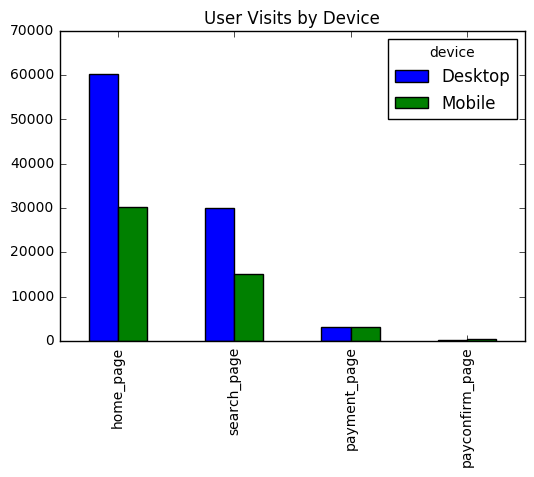

In [145]:
ax = funnel.groupby('device')['home_page','search_page','payment_page','payconfirm_page'].sum().T.plot(kind='bar',title='User Visits by Device')
funnel.groupby('device')['home_page','search_page','payment_page','payconfirm_page'].sum()

,home_page,search_page,payment_page,payconfirm_page
month,,,,
1,15050,7529.0,1221.0,60.0
2,15050,7632.0,1191.0,54.0
3,15050,7370.0,296.0,14.0
4,15050,7569.0,302.0,22.0


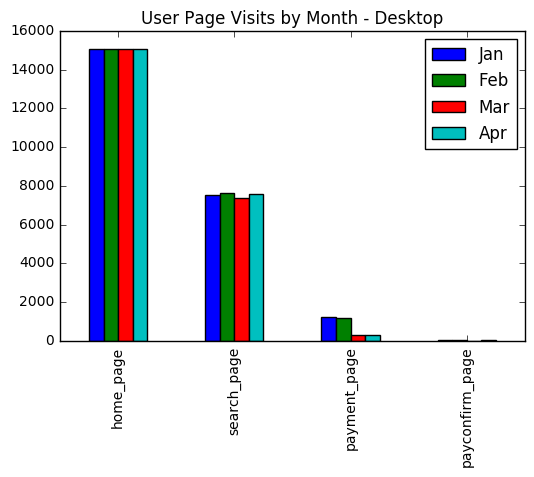

In [182]:

ax = funnel[funnel['device']=='Desktop'].groupby('month')['home_page','search_page','payment_page','payconfirm_page'].sum().T.plot(kind='bar')
ax.set_title('User Page Visits by Month - Desktop')
ax.legend(['Jan','Feb','Mar','Apr'])
funnel[funnel['device']=='Desktop'].groupby('month')['home_page','search_page','payment_page','payconfirm_page'].sum()

,home_page,search_page,payment_page,payconfirm_page
month,,,,
1,7550,6025.0,1169.0,129.0
2,7550,6055.0,1221.0,119.0
3,7550,1509.0,335.0,30.0
4,7550,1511.0,295.0,24.0


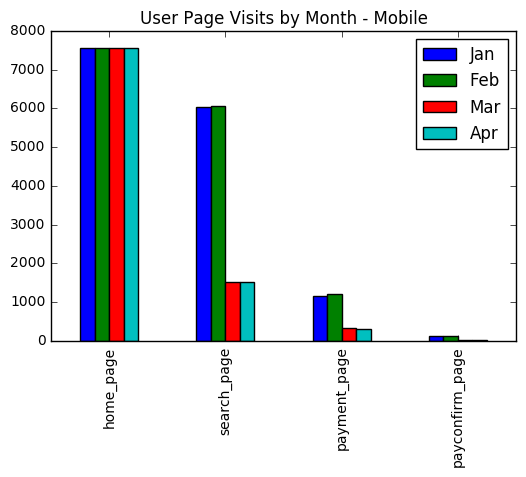

In [183]:
ax = funnel[funnel['device']=='Mobile'].groupby('month')['home_page','search_page','payment_page','payconfirm_page'].sum().T.plot(kind='bar')
ax.set_title('User Page Visits by Month - Mobile')
ax.legend(['Jan','Feb','Mar','Apr'])
funnel[funnel['device']=='Mobile'].groupby('month')['home_page','search_page','payment_page','payconfirm_page'].sum()

home_page          30100.0
search_page        15161.0
payment_page        2412.0
payconfirm_page      114.0
dtype: float64

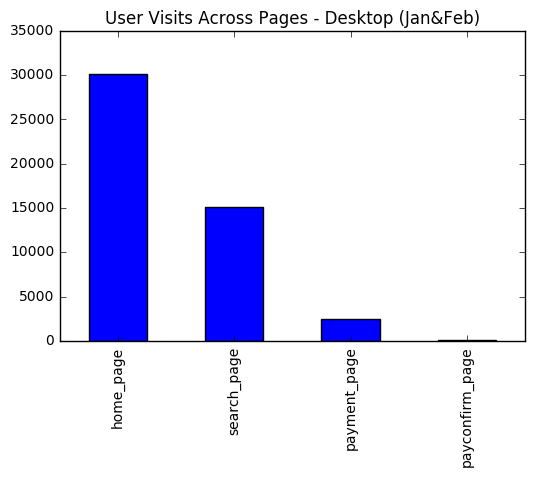

In [205]:
funnel_mon_1_2 = funnel[(funnel.month == 1) | (funnel.month == 2)]
funnel_mon_1_2[funnel_mon_1_2.device=='Desktop'][['home_page','search_page','payment_page','payconfirm_page']].sum().plot(kind='bar',title='User Visits Across Pages - Desktop (Jan&Feb)')
funnel_mon_1_2[funnel_mon_1_2.device=='Desktop'][['home_page','search_page','payment_page','payconfirm_page']].sum()


home_page          15100.0
search_page        12080.0
payment_page        2390.0
payconfirm_page      248.0
dtype: float64

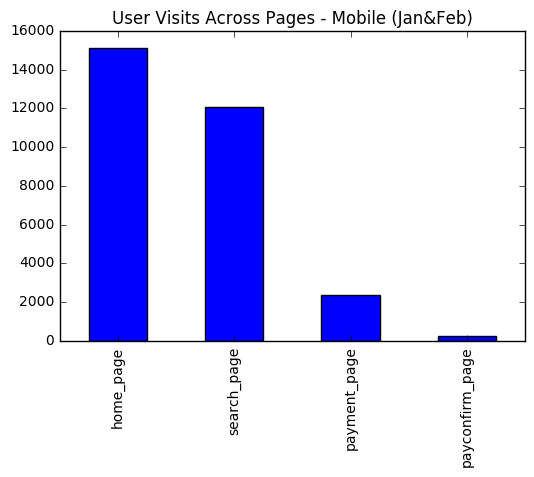

In [206]:
funnel_mon_1_2[funnel_mon_1_2.device=='Mobile'][['home_page','search_page','payment_page','payconfirm_page']].sum().plot(kind='bar',title='User Visits Across Pages - Mobile (Jan&Feb)')
funnel_mon_1_2[funnel_mon_1_2.device=='Mobile'][['home_page','search_page','payment_page','payconfirm_page']].sum()